In [1]:
import pandas as pd 
import os
import glob
import datetime, warnings, scipy 
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "/Users/xiomaragonzalez/Desktop/train_2019.csv"
data = pd.read_csv(path)
data.head()

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN
1,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1130,1213.0,43.0,0.0,1444.0,43.0,0.0,0.0,0.0,0.0
2,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,725,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN
3,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,930,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN
4,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1130,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN


In [44]:
core30 = data['ORIGIN'].unique()
airlines = data['CARRIER_NAME'].unique()
airport_airline_matrix = pd.DataFrame(core30)
airport_airline_matrix.set_index(0, inplace=True)

origin_loc = data[['ORIGIN','ORIGIN_CITY_NAME']]
origin_loc = origin_loc.set_index('ORIGIN')['ORIGIN_CITY_NAME'].to_dict()
# sorted_origin_loc = {key: value for key, value in sorted(origin_loc.items())}
sorted_origin_loc = dict(sorted(origin_loc.items(), key=lambda item: item[1]))

sorted_origin_loc['JFK'] = 'New York, NY (JFK)'
sorted_origin_loc['LGA'] = 'New York, NY (LGA)'
sorted_origin_loc['MDW'] = 'Chicago, IL (MDW)'
sorted_origin_loc['ORD'] = 'Chicago, IL (ORD)'

sorted_origin_loc

{'ATL': 'Atlanta, GA',
 'BWI': 'Baltimore, MD',
 'BOS': 'Boston, MA',
 'CLT': 'Charlotte, NC',
 'MDW': 'Chicago, IL (MDW)',
 'ORD': 'Chicago, IL (ORD)',
 'DFW': 'Dallas/Fort Worth, TX',
 'DEN': 'Denver, CO',
 'DTW': 'Detroit, MI',
 'FLL': 'Fort Lauderdale, FL',
 'HNL': 'Honolulu, HI',
 'IAH': 'Houston, TX',
 'LAS': 'Las Vegas, NV',
 'LAX': 'Los Angeles, CA',
 'MEM': 'Memphis, TN',
 'MIA': 'Miami, FL',
 'MSP': 'Minneapolis, MN',
 'JFK': 'New York, NY (JFK)',
 'LGA': 'New York, NY (LGA)',
 'EWR': 'Newark, NJ',
 'MCO': 'Orlando, FL',
 'PHL': 'Philadelphia, PA',
 'PHX': 'Phoenix, AZ',
 'SLC': 'Salt Lake City, UT',
 'SAN': 'San Diego, CA',
 'SFO': 'San Francisco, CA',
 'SEA': 'Seattle, WA',
 'TPA': 'Tampa, FL',
 'IAD': 'Washington, DC',
 'DCA': 'Washington, DC'}

In [45]:
data['DEP_DELAY_NEW'] = data['DEP_DELAY_NEW'].fillna(0)
data['DEP_DELAY_NEW'].astype(float)

for a in airlines:
    data_airline = data[data['CARRIER_NAME'] == a]
    delay_by_origin = data_airline['DEP_DELAY_NEW'].groupby(data_airline['ORIGIN']).mean()
    airport_airline_matrix[a] = delay_by_origin

In [46]:
airport_airline_matrix.head()

,American Airlines Inc.,Southwest Airlines Co.,SkyWest Airlines Inc.,Frontier Airlines Inc.,Mesa Airlines Inc.,United Air Lines Inc.,JetBlue Airways,Alaska Airlines Inc.,Delta Air Lines Inc.,Comair Inc.,Atlantic Southeast Airlines,American Eagle Airlines Inc.
0,,,,,,,,,,,,
PHX,12.796700,14.632579,9.175787,16.505000,16.285030,14.837566,30.356938,8.928228,9.441338,NaN,NaN,NaN
PHL,14.958531,12.895018,15.252226,26.152104,14.754501,18.228885,25.762040,13.423077,12.468550,14.772806,5.375000,8.976744
EWR,17.643064,22.017374,28.665568,32.716535,NaN,23.687051,33.046523,17.160806,23.171213,NaN,25.875199,16.915289
CLT,16.394967,13.493425,28.247879,22.659091,14.817984,23.914491,31.744315,NaN,10.989395,10.974636,28.402098,NaN
MDW,NaN,17.075298,14.043845,NaN,NaN,NaN,NaN,NaN,7.825433,NaN,NaN,NaN


In [52]:
airport_airline_matrix = airport_airline_matrix.rename(index=sorted_origin_loc)
airport_airline_matrix = airport_airline_matrix.sort_index()
airport_airline_matrix = airport_airline_matrix.reindex(sorted(airport_airline_matrix.columns), axis=1)
airport_airline_matrix.head()

,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Comair Inc.,Delta Air Lines Inc.,Frontier Airlines Inc.,JetBlue Airways,Mesa Airlines Inc.,SkyWest Airlines Inc.,Southwest Airlines Co.,United Air Lines Inc.
0,,,,,,,,,,,,
"Atlanta, GA",11.986301,12.727707,22.550617,11.391393,14.813571,12.111326,21.880233,25.106639,17.698167,24.896078,14.428372,24.150606
"Baltimore, MD",12.360972,13.542254,22.079347,NaN,8.625000,10.536617,23.996441,20.374863,NaN,16.247863,15.030083,12.043008
"Boston, MA",13.719036,14.863745,9.753846,10.733333,17.894737,17.269603,18.099576,21.305702,13.913043,14.680529,13.539820,18.342780
"Charlotte, NC",NaN,16.394967,NaN,28.402098,10.974636,10.989395,22.659091,31.744315,14.817984,28.247879,13.493425,23.914491
"Chicago, IL (MDW)",NaN,NaN,NaN,NaN,NaN,7.825433,NaN,NaN,NaN,14.043845,17.075298,NaN


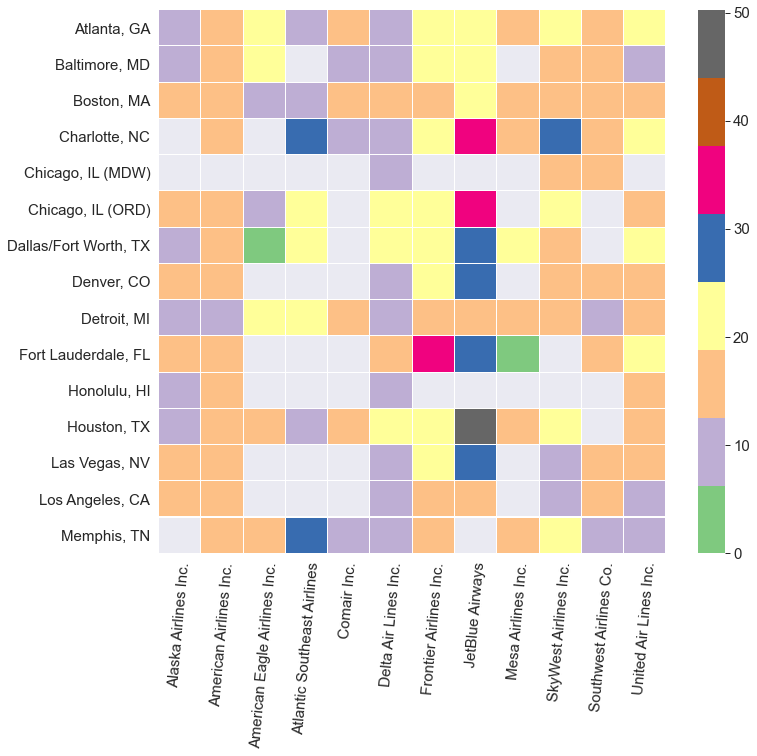

In [56]:
fig = plt.figure(1, figsize = (25,10))
# fig.suptitle('Origin Airport Impact on Dealy',fontsize=25,fontweight='semibold')
sea.set(context="paper")

left_airports = airport_airline_matrix.iloc[:15]
right_airports = airport_airline_matrix.iloc[15:]
max_delay = airport_airline_matrix.melt().value.max()

ax0 = fig.add_subplot(1,2,1)
sea.heatmap(left_airports, linewidths=0.01, cmap="Accent", vmin=0, vmax=max_delay)
plt.setp(ax0.get_xticklabels(), fontsize=15, rotation=85)
plt.setp(ax0.get_yticklabels(), fontsize=15, rotation=0)
cbar = ax0.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax0.yaxis.label.set_visible(False)

fig.savefig('heatmap_1.jpg', format='jpg', bbox_inches='tight',dpi=300,facecolor=fig.get_facecolor(), edgecolor='none')

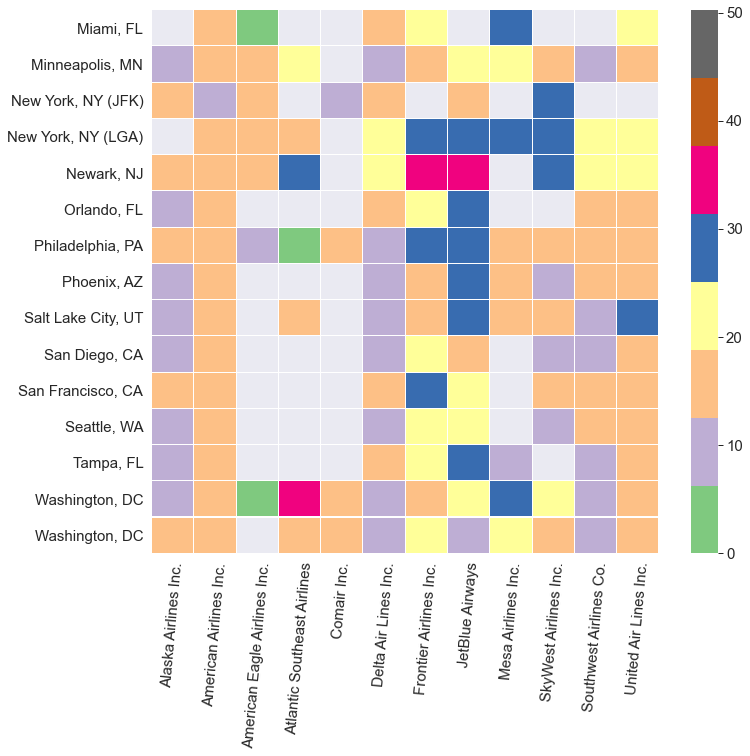

In [57]:
fig = plt.figure(1, figsize = (25,10))
sea.set(context="paper")

ax1 = fig.add_subplot(1,2,1)
sea.heatmap(right_airports, linewidths=0.01, cmap="Accent", vmin=0, vmax=max_delay)
plt.setp(ax1.get_xticklabels(), fontsize=15, rotation=85)
plt.setp(ax1.get_yticklabels(), fontsize=15, rotation=0)
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax1.yaxis.label.set_visible(False)

fig.savefig('heatmap_2.jpg', format='jpg', bbox_inches='tight',dpi=300,facecolor=fig.get_facecolor(), edgecolor='none')

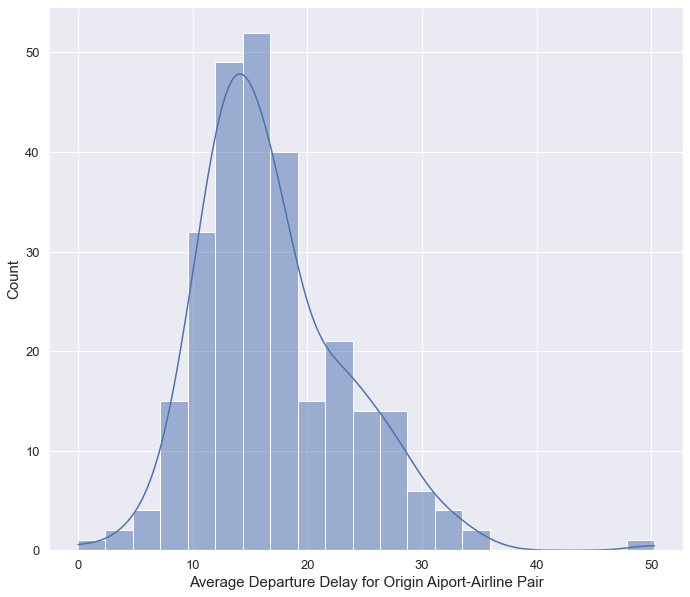

In [118]:
stacked = airport_airline_matrix.melt()
stacked = stacked.rename(columns={'value':'Average Departure Delay for Origin Aiport-Airline Pair'})
# stacked.head()

fig = plt.figure(1, figsize = (25,10))
ax = fig.add_subplot(1,2,1)

b = sea.histplot(data=stacked, x="Average Departure Delay for Origin Aiport-Airline Pair", kde=True)
b.set_xlabel("Average Departure Delay for Origin Aiport-Airline Pair",fontsize=15)
b.set_ylabel("Count",fontsize=15)

plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=13)

fig.savefig('count_heatmap_12.jpg', format='jpg', bbox_inches='tight',dpi=300,facecolor=fig.get_facecolor(), edgecolor='none')